In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as font_manager
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv("df1.csv")
df2=pd.read_csv("df2.csv")
df3=pd.read_csv("df3.csv")
df4=pd.read_csv("df4.csv")
df5=pd.read_csv("df5.csv")



In [3]:
df1.head()

,Unnamed: 0,Season_End_Year,Squad,Comp,Player,Nation,Pos,Age,Born,Mins_Per_90,...,Prog_Carries,Final_Third_Carries,CPA_Carries,Mis_Carries,Dis_Carries,Targ_Receiving,Rec_Receiving,Rec_percent_Receiving,Prog_Receiving,Url
0,1,2022,Alavés,La Liga,Martin Agirregabiria,ESP,DF,25.0,1996.0,18.0,...,47,18,2,10,11,545,470,86.2,19,https://fbref.com/en/players/355c883a/Martin-A...
1,2,2022,Alavés,La Liga,Mircea Alexandru Tirlea,ROU,DF,21.0,2000.0,0.2,...,0,0,0,0,0,4,4,100.0,0,https://fbref.com/en/players/683a1d81/Mircea-A...
2,3,2022,Alavés,La Liga,Rubén Duarte,ESP,DF,25.0,1995.0,29.1,...,80,30,5,12,13,795,725,91.2,22,https://fbref.com/en/players/1fe0492d/Ruben-Du...
3,4,2022,Alavés,La Liga,Gonzalo Escalante,ARG,MF,28.0,1993.0,14.4,...,22,3,0,14,11,335,275,82.1,20,https://fbref.com/en/players/3f79a1c8/Gonzalo-...
4,5,2022,Alavés,La Liga,Manu García,ESP,MF,23.0,1998.0,12.0,...,64,15,4,17,22,544,469,86.2,30,https://fbref.com/en/players/6ed1a2a2/Manu-Garcia


In [4]:
filenames=[df1,df2,df3,df4,df5]

In [5]:
df = filenames[0]
for df_ in filenames[1:]:
    df = df.merge(df_,how='inner',on=['Player','Squad','Comp','Season_End_Year','Nation','Pos','Age','Born'])

In [6]:
df.head()


,Unnamed: 0_x,Season_End_Year,Squad,Comp,Player,Nation,Pos,Age,Born,Mins_Per_90_x,...,xG_Expected_y,npxG_Expected_y,xA_Expected,npxG+xA_Expected,xG_Per,xA_Per,xG+xA_Per,npxG_Per,npxG+xA_Per,Url
0,1,2022,Alavés,La Liga,Martin Agirregabiria,ESP,DF,25.0,1996.0,18.0,...,0.2,0.2,1.0,1.2,0.01,0.05,0.07,0.01,0.07,https://fbref.com/en/players/355c883a/Martin-A...
1,2,2022,Alavés,La Liga,Mircea Alexandru Tirlea,ROU,DF,21.0,2000.0,0.2,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,https://fbref.com/en/players/683a1d81/Mircea-A...
2,3,2022,Alavés,La Liga,Rubén Duarte,ESP,DF,25.0,1995.0,29.1,...,0.5,0.5,2.1,2.6,0.02,0.07,0.09,0.02,0.09,https://fbref.com/en/players/1fe0492d/Ruben-Du...
3,4,2022,Alavés,La Liga,Gonzalo Escalante,ARG,MF,28.0,1993.0,14.4,...,2.9,2.9,0.1,3.0,0.20,0.01,0.21,0.20,0.21,https://fbref.com/en/players/3f79a1c8/Gonzalo-...
4,5,2022,Alavés,La Liga,Manu García,ESP,MF,23.0,1998.0,12.0,...,0.3,0.3,1.1,1.4,0.03,0.09,0.12,0.03,0.12,https://fbref.com/en/players/6ed1a2a2/Manu-Garcia


In [7]:
df.shape

(2921, 126)

In [8]:
new_data=pd.read_csv("EPL.csv")

In [9]:
new_data.shape

(2921, 111)

In [10]:
epl_data=new_data[new_data['Comp']=='Premier League']

In [11]:
epl_data.shape

(546, 111)

In [12]:
epl_data.columns

Index(['Season_End_Year', 'Squad', 'Comp', 'Player', 'Nation', 'Pos', 'Age',
       'Born', 'Mins_Per_90', 'Touches_Touches',
       ...
       'G+A_Per', 'G_minus_PK_Per', 'G+A_minus_PK_Per', 'xA_Expected',
       'npxG+xA_Expected', 'xG_Per', 'xA_Per', 'xG+xA_Per', 'npxG_Per',
       'npxG+xA_Per'],
      dtype='object', length=111)

In [13]:
ud_data=pd.read_csv("Playerdata.csv")

In [14]:
ud_data.columns

Index(['Unnamed: 0', 'player_id', 'Player', 'games', 'time', 'goals', 'xG',
       'assists', 'xA', 'shots', 'key_passes', 'yellow_cards', 'red_cards',
       'position', 'team_name', 'npg', 'npxG', 'xGChain', 'xGBuildup', 'year'],
      dtype='object')

In [15]:
final_data=epl_data.merge(ud_data,how='inner',on='Player')

In [16]:
final_data.shape

(498, 130)

In [17]:
final_data.columns

Index(['Season_End_Year', 'Squad', 'Comp', 'Player', 'Nation', 'Pos', 'Age',
       'Born', 'Mins_Per_90', 'Touches_Touches',
       ...
       'key_passes', 'yellow_cards', 'red_cards', 'position', 'team_name',
       'npg', 'npxG', 'xGChain', 'xGBuildup', 'year'],
      dtype='object', length=130)

In [2]:
final_data=pd.read_csv("FINALDATA.csv")

In [3]:
final_data=final_data[["Player","Pos","Mins_Per_90","Succ_Dribbles","PrgDist_Total","Prog_Receiving","Cmp_percent_Total","Att_Total",
"Cmp_Short","Cmp_Medium","Cmp_Long","xA_x","KP","CrsPA","Prog","Prog_Carries","Sh_Standard","npxG_Expected","SCA_SCA","xGChain","xGBuildup"]]


In [4]:
final_data.shape

(498, 21)

In [5]:
final_data.columns=['player_name','position','90s','succ_dribbles','progressive_distance','progreceiving_passes','pass_cmp_rate','passes_attempted',
           'succ_short_passes','succ_medium_passes','succ_long_passes','xA','KP','crosses_pen_area','progressive_passes','progressive_carries','shots','npxG',
           'shot_creating_actions','xGChain','xGBuildup']
#final_data["succ_short_passes"] = final_data['succ_short_passes'] + final_data['succ_medium_passes']
#final_data["short_ratio"] = final_data["succ_short_passes"]/final_data["passes_attempted"]
#final_data["long_ratio"] = final_data["succ_long_passes"]/final_data["passes_attempted"]
final_data = final_data[(final_data["90s"]>15) & (final_data["position"]!="GK")].reset_index(drop=True)
'''
final_data[['player_name','position','90s','succ_dribbles','progressive_distance','receiving_passes','pass_cmp_rate','passes_attempted',
           'succ_short_passes','succ_medium_passes','succ_long_passes','xA','KP','crosses_pen_area','progressive_passes','shots','npxG',
           'shot_creating_actions','xGChain','xGBuildup']]=final_data[['player_name','position','90s','succ_dribbles','progressive_distance','receiving_passes','pass_cmp_rate','passes_attempted',
           'succ_short_passes','succ_medium_passes','succ_long_passes','xA','KP','crosses_pen_area','progressive_passes','shots','npxG',
           'shot_creating_actions','xGChain','xGBuildup']].div(final_data['90s'], axis=0)
'''

"\nfinal_data[['player_name','position','90s','succ_dribbles','progressive_distance','receiving_passes','pass_cmp_rate','passes_attempted',\n           'succ_short_passes','succ_medium_passes','succ_long_passes','xA','KP','crosses_pen_area','progressive_passes','shots','npxG',\n           'shot_creating_actions','xGChain','xGBuildup']]=final_data[['player_name','position','90s','succ_dribbles','progressive_distance','receiving_passes','pass_cmp_rate','passes_attempted',\n           'succ_short_passes','succ_medium_passes','succ_long_passes','xA','KP','crosses_pen_area','progressive_passes','shots','npxG',\n           'shot_creating_actions','xGChain','xGBuildup']].div(final_data['90s'], axis=0)\n"

In [6]:
final_data.head()

,player_name,position,90s,succ_dribbles,progressive_distance,progreceiving_passes,pass_cmp_rate,passes_attempted,succ_short_passes,succ_medium_passes,...,xA,KP,crosses_pen_area,progressive_passes,progressive_carries,shots,npxG,shot_creating_actions,xGChain,xGBuildup
0,Alexandre Lacazette,"FW,MF",19.8,17,993,129,76.8,456,217,87,...,1.9,24,1,37,46,43,5.6,65,9.149895,3.097580
1,Thomas Partey,MF,22.5,29,4742,14,85.9,1183,420,422,...,1.3,18,0,116,86,44,2.5,51,9.639085,8.366635
2,Bukayo Saka,"FW,MF",33.1,49,3277,233,75.3,1184,514,293,...,6.9,65,7,73,262,95,8.2,142,19.449898,9.058581
3,Cédric Soares,DF,16.5,7,4753,8,78.7,1110,429,336,...,1.4,18,14,51,83,12,0.5,36,5.350096,4.619294
4,Kieran Tierney,DF,21.3,11,5517,59,77.7,1164,352,449,...,1.9,22,16,76,111,15,0.7,38,6.728196,5.273796


In [7]:
final_data.columns

Index(['player_name', 'position', '90s', 'succ_dribbles',
       'progressive_distance', 'progreceiving_passes', 'pass_cmp_rate',
       'passes_attempted', 'succ_short_passes', 'succ_medium_passes',
       'succ_long_passes', 'xA', 'KP', 'crosses_pen_area',
       'progressive_passes', 'progressive_carries', 'shots', 'npxG',
       'shot_creating_actions', 'xGChain', 'xGBuildup'],
      dtype='object')

In [8]:
final_data["succ_short_passes"] = final_data['succ_short_passes'] + final_data['succ_medium_passes']
final_data["short_ratio"] = final_data["succ_short_passes"]/final_data["passes_attempted"]
final_data["long_ratio"] = final_data["succ_long_passes"]/final_data["passes_attempted"]

In [9]:
final_data[['succ_dribbles','progressive_distance','progreceiving_passes','progressive_carries','pass_cmp_rate','passes_attempted',
           'succ_short_passes','succ_medium_passes','succ_long_passes','xA','KP','crosses_pen_area','progressive_passes','shots','npxG',
           'shot_creating_actions','xGChain','xGBuildup']]=final_data[['succ_dribbles','progressive_distance','progreceiving_passes','progressive_carries','pass_cmp_rate','passes_attempted',
           'succ_short_passes','succ_medium_passes','succ_long_passes','xA','KP','crosses_pen_area','progressive_passes','shots','npxG',
           'shot_creating_actions','xGChain','xGBuildup']].div(final_data['90s'], axis=0)

In [10]:
final_data.drop(["passes_attempted", "succ_short_passes", "succ_long_passes", "succ_medium_passes"], axis=1, inplace=True)

In [11]:
final_data.head()

,player_name,position,90s,succ_dribbles,progressive_distance,progreceiving_passes,pass_cmp_rate,xA,KP,crosses_pen_area,progressive_passes,progressive_carries,shots,npxG,shot_creating_actions,xGChain,xGBuildup,short_ratio,long_ratio
0,Alexandre Lacazette,"FW,MF",19.8,0.858586,50.151515,6.515152,3.878788,0.095960,1.212121,0.050505,1.868687,2.323232,2.171717,0.282828,3.282828,0.462116,0.156443,0.666667,0.046053
1,Thomas Partey,MF,22.5,1.288889,210.755556,0.622222,3.817778,0.057778,0.800000,0.000000,5.155556,3.822222,1.955556,0.111111,2.266667,0.428404,0.371850,0.711750,0.133559
2,Bukayo Saka,"FW,MF",33.1,1.480363,99.003021,7.039275,2.274924,0.208459,1.963746,0.211480,2.205438,7.915408,2.870091,0.247734,4.290030,0.587610,0.273673,0.681588,0.048986
3,Cédric Soares,DF,16.5,0.424242,288.060606,0.484848,4.769697,0.084848,1.090909,0.848485,3.090909,5.030303,0.727273,0.030303,2.181818,0.324248,0.279957,0.689189,0.081982
4,Kieran Tierney,DF,21.3,0.516432,259.014085,2.769953,3.647887,0.089202,1.032864,0.751174,3.568075,5.211268,0.704225,0.032864,1.784038,0.315878,0.247596,0.688144,0.079038


In [12]:
features=['shots','npxG','KP','xA','xGChain','xGBuildup','crosses_pen_area','succ_dribbles','progreceiving_passes','progressive_distance',
         'progressive_passes','progressive_carries','pass_cmp_rate','short_ratio','long_ratio','shot_creating_actions']

In [13]:
from sklearn.preprocessing import MinMaxScaler

np.random.seed(42)
scaler = MinMaxScaler()

In [14]:
final_data[features] = pd.DataFrame(scaler.fit_transform(final_data[features].values), columns=features, index=final_data.index) ##scale values inplace
X = final_data[features].values

In [15]:
N_FEATURES = len(features)
N_CLUSTERS = 11
N_DIMENSIONS_TSNE = 2
N_INTERPRETABLE_DIMS = 8

print(f"Number of features: {N_FEATURES}")

Number of features: 16


In [16]:
from sklearn.manifold import TSNE

Xs_embedded = TSNE(n_components=N_DIMENSIONS_TSNE).fit_transform(X)

In [17]:
final_data['position'].unique()

array(['FW,MF', 'MF', 'DF', 'MF,DF', 'FW', 'DF,FW', 'MF,FW', 'DF,MF',
       'FW,DF'], dtype=object)

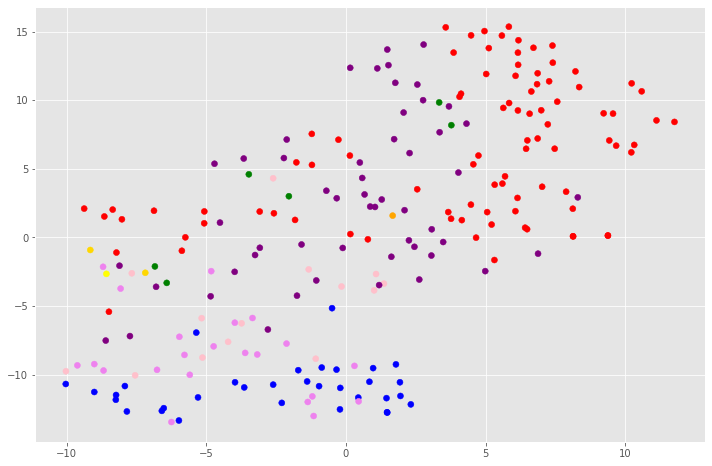

In [18]:
import matplotlib.pyplot as plt

with plt.style.context('ggplot'):
    
    fig, ax = plt.subplots(figsize=(12,8))
    colors = final_data['position'].map({'DF': 'red', 
                             'MF,DF': 'green', 
                             'MF': 'purple', 
                             'MF,FW': 'pink', 
                             'FW': 'blue', 
                             'FW,MF': 'violet',
                             'DF,MF': 'orange', 
                             'DF,FW': 'gold',
                             'FW,DF':'yellow'})
    
    ax.scatter(x=Xs_embedded[:, 0], y=Xs_embedded[:, 1], c=colors)

In [19]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=6, n_init=10, random_state=42)
gm.fit(Xs_embedded)

GaussianMixture(n_components=6, n_init=10, random_state=42)

In [20]:
gm.weights_

array([0.17402958, 0.10760712, 0.25860202, 0.25474661, 0.12640684,
       0.07860783])

In [21]:
gm.converged_

True

In [22]:
gm.n_iter_

18

In [23]:
final_data['cluster']=gm.predict(Xs_embedded)

In [24]:
X_new, y_new = gm.sample(6)
X_new

array([[-1.53952057, -8.48283552],
       [ 0.35832927,  4.77056947],
       [ 0.857681  ,  4.25146166],
       [12.92768545,  6.55565243],
       [ 1.66860663, 10.03928854],
       [-7.65134746, -3.64728416]])

In [25]:
y_new

array([0, 1, 1, 2, 2, 4])

In [26]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.6705951472926189

In [47]:
gm.predict_proba(Xs_embedded)

array([[9.97146283e-001, 2.41507743e-011, 4.53793560e-017,
        2.64246630e-003, 2.11250594e-004, 9.87846091e-015],
       [2.52544474e-019, 9.15472747e-001, 1.24978565e-004,
        8.43364715e-002, 6.58026231e-005, 1.44508556e-058],
       [2.09249435e-001, 4.07060469e-010, 2.57496935e-024,
        3.96230838e-003, 5.88915891e-002, 7.27896667e-001],
       ...,
       [1.12956723e-062, 2.26663737e-004, 9.99773224e-001,
        1.12209203e-007, 3.63643511e-015, 2.76492832e-146],
       [1.08162471e-002, 7.79332848e-005, 1.18551872e-017,
        8.01464487e-003, 9.81091076e-001, 9.91969916e-008],
       [1.63559284e-012, 2.87385701e-002, 2.47264034e-006,
        9.71220823e-001, 3.81340984e-005, 7.21529197e-048]])

In [27]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

In [28]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

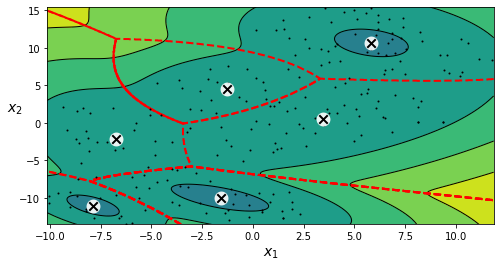

In [29]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, Xs_embedded)

plt.savefig("gaussian_mixtures_plot",tight_layout=True,dpi=300)
plt.show()

In [30]:
gm.bic(Xs_embedded)

2860.390919304862

In [31]:
gm.aic(Xs_embedded)

2741.297210939332

In [32]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(Xs_embedded)
             for k in range(1, 11)]

In [33]:
bics = [model.bic(Xs_embedded) for model in gms_per_k]
aics = [model.aic(Xs_embedded) for model in gms_per_k]

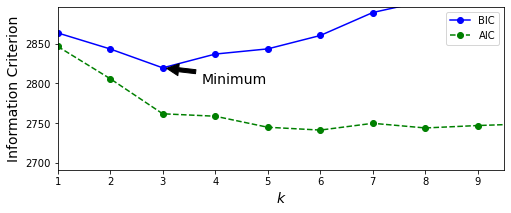

In [34]:

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.savefig("aic_bic_vs_k_plot",dpi=300,tight_layout=True)
plt.show()

In [35]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(Xs_embedded).bic(Xs_embedded)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [36]:
best_k

4

In [37]:
best_covariance_type

'tied'

In [38]:
from sklearn.mixture import BayesianGaussianMixture

In [39]:
bgm = BayesianGaussianMixture(n_components=4, n_init=10, random_state=42)
bgm.fit(Xs_embedded)

BayesianGaussianMixture(n_components=4, n_init=10, random_state=42)

In [40]:
np.round(bgm.weights_, 2)

array([0.3, 0.3, 0.2, 0.2])

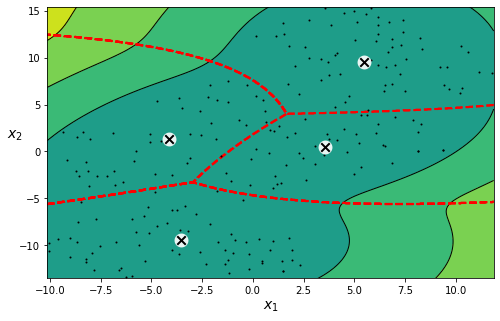

In [41]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, Xs_embedded)
plt.show()

In [42]:
gm_final = GaussianMixture(n_components=4, n_init=10, covariance_type="tied", random_state=42)

In [43]:
gm_final.fit(Xs_embedded)

GaussianMixture(covariance_type='tied', n_components=4, n_init=10,
                random_state=42)

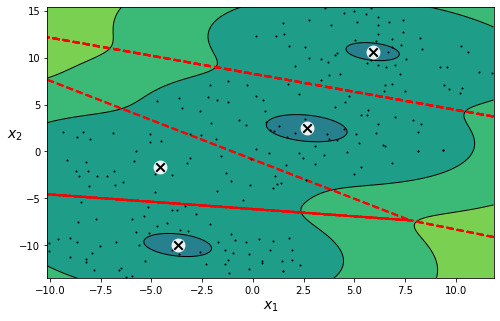

In [44]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(gm_final, Xs_embedded)
plt.show()

In [45]:
final_data['cluster']=gm_final.predict(Xs_embedded)

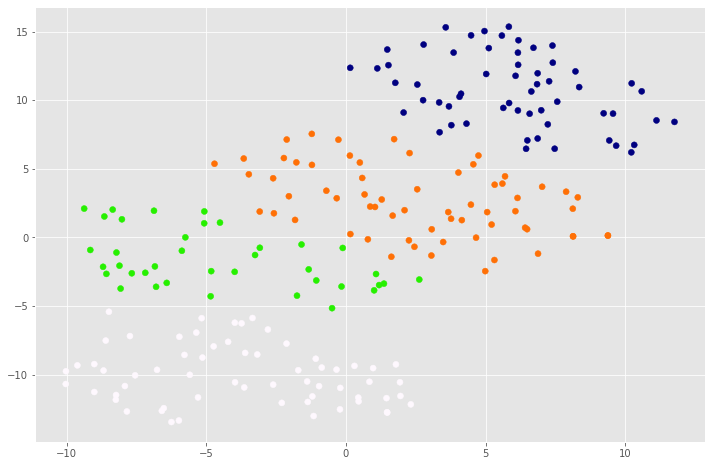

In [46]:
with plt.style.context('ggplot'):
    
    fig, ax = plt.subplots(figsize=(12,8))
    ax.scatter(x=Xs_embedded[:, 0], y=Xs_embedded[:, 1], c=final_data['cluster'], cmap='gist_ncar')

In [69]:
N_INTERPRETABLE_DIMS=4

In [70]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation='promax', n_factors = N_INTERPRETABLE_DIMS)

fa.fit(X)

fa_Xs = fa.fit_transform(X)

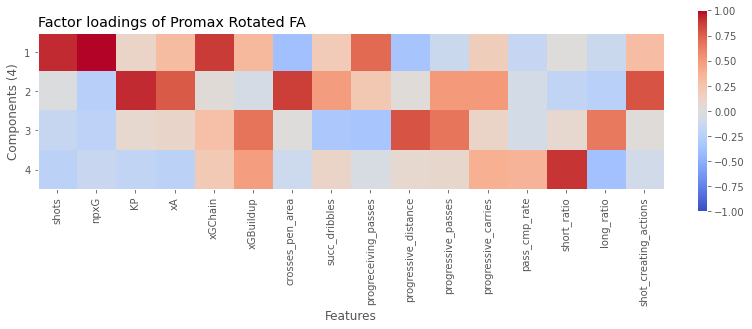

In [71]:
import matplotlib.pyplot as plt

with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(12, 12))
    im = ax.imshow(fa.loadings_.T, cmap='coolwarm', vmin=-1, vmax=1)
    ax.set_xticks(range(N_FEATURES))
    ax.set_yticks(range(N_INTERPRETABLE_DIMS))
    ax.set_xticklabels(features, rotation=90)
    ax.set_yticklabels(range(1, N_INTERPRETABLE_DIMS + 1))
    plt.colorbar(im, fraction=0.015)
    ax.set(ylabel = f"Components ({N_INTERPRETABLE_DIMS})", xlabel="Features")
    ax.grid(False)
    ax.title.set(text="Factor loadings of Promax Rotated FA", x=0, ha='left')
    fig.savefig('fa_promax_loadings.png', dpi=200)    

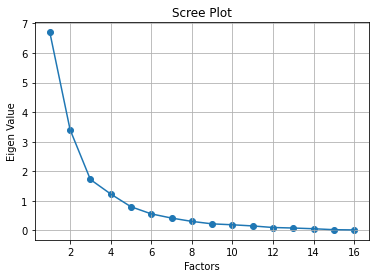

In [68]:
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In [72]:
print(final_data.query("cluster==1")['player_name'].unique())

['Cédric Soares' 'Kieran Tierney' 'Takehiro Tomiyasu' 'John McGinn'
 'Jacob Ramsey' 'Mathias Jensen' 'Marc Cucurella' 'Pascal Groß'
 'Tariq Lamptey' 'Alexis Mac Allister' 'Solly March' 'Jakub Moder'
 'Dwight McNeil' 'Marcos Alonso' 'Reece James' 'Jordan Ayew'
 'Jeffrey Schlupp' 'Alex Iwobi' 'Andros Townsend' 'Mateusz Klich'
 'Kiernan Dewsbury-Hall' 'Youri Tielemans' 'Jordan Henderson'
 'Andrew Robertson' 'João Cancelo' 'Miguel Almirón' 'Ryan Fraser'
 'Joelinton' 'Jacob Murphy' 'Joe Willock' 'Stuart Armstrong'
 'Nathan Redmond' 'James Ward-Prowse' 'Sergio Reguilón' 'Juraj Kucka'
 'Pablo Fornals' 'Ben Johnson' 'Daniel Podence']


In [73]:
print(final_data.query("cluster==2")['player_name'].unique())

['Thomas Partey' 'Granit Xhaka' 'Douglas Luiz' 'Matt Targett'
 'Kristoffer Ajer' 'Rico Henry' 'Vitaly Janelt' 'Christian Nørgaard'
 'Yves Bissouma' 'Adam Lallana' 'Josh Brownhill' 'Aaron Lennon'
 'Matthew Lowton' 'Connor Roberts' 'Charlie Taylor' 'César Azpilicueta'
 'Jorginho' 'Ruben Loftus-Cheek' 'Antonio Rüdiger' 'James McArthur'
 'Tyrick Mitchell' 'Allan' 'Abdoulaye Doucouré' 'Ben Godfrey'
 'Stuart Dallas' 'Timothy Castagne' 'Luke Thomas' 'Thiago Alcántara'
 'Fabinho' 'Rúben Dias' 'Rodri' 'Kyle Walker' 'Diogo Dalot' 'Fred'
 'Scott McTominay' 'Luke Shaw' 'Alex Telles' 'Aaron Wan-Bissaka'
 'Emil Krafth' 'Max Aarons' 'Pierre Lees-Melou' 'Kenny McLean'
 'Brandon Williams' 'Valentino Livramento' 'Romain Perraud' 'Oriol Romeu'
 'Kyle Walker-Peters' 'Rodrigo Bentancur' 'Ben Davies' 'Emerson'
 'Tom Cleverley' 'Kiko Femenía' 'Hassane Kamara' 'Moussa Sissoko'
 'Aaron Cresswell' 'Manuel Lanzini' 'Declan Rice' 'Fernando Marçal'
 'João Moutinho' 'Nélson Semedo']


In [74]:
print(final_data.query("cluster==3")['player_name'].unique())

['Alexandre Lacazette' 'Bukayo Saka' 'Danny Ings' 'Ollie Watkins'
 'Bryan Mbeumo' 'Ivan Toney' 'Neal Maupay' 'Leandro Trossard'
 'Danny Welbeck' 'Maxwel Cornet' 'Jay Rodriguez' 'Wout Weghorst'
 'Chris Wood' 'Kai Havertz' 'Romelu Lukaku' 'Mason Mount'
 'Conor Gallagher' 'Wilfried Zaha' 'Anthony Gordon' 'Demarai Gray'
 'Richarlison' 'Jack Harrison' 'Daniel James' 'Raphinha' 'Rodrigo'
 'Harvey Barnes' 'Ademola Lookman' 'James Maddison' 'Jamie Vardy'
 'Trent Alexander-Arnold' 'Diogo Jota' 'Sadio Mané' 'Mohamed Salah'
 'Kevin De Bruyne' 'Phil Foden' 'Jack Grealish' 'Gabriel Jesus'
 'Riyad Mahrez' 'Bernardo Silva' 'Raheem Sterling' 'Bruno Fernandes'
 'Cristiano Ronaldo' 'Jadon Sancho' 'Allan Saint-Maximin' 'Callum Wilson'
 'Teemu Pukki' 'Milot Rashica' 'Che Adams' 'Adam Armstrong'
 'Armando Broja' 'Mohamed Elyounoussi' 'Harry Kane' 'Lucas Moura'
 'Emmanuel Dennis' 'João Pedro' 'Joshua King' 'Ismaila Sarr'
 'Michail Antonio' 'Jarrod Bowen' 'Raúl Jiménez']


In [75]:
print(final_data.query("cluster==0")['player_name'].unique())

['Ben White' 'Tyrone Mings' 'Pontus Jansson' 'Ethan Pinnock' 'Dan Burn'
 'Shane Duffy' 'Lewis Dunk' 'Joël Veltman' 'Adam Webster' 'Nathan Collins'
 'Jack Cork' 'Ben Mee' 'James Tarkowski' 'Ashley Westwood'
 'Trevoh Chalobah' 'Andreas Christensen' 'Thiago Silva' 'Joachim Andersen'
 'Cheikhou Kouyaté' 'Joel Ward' 'Mason Holgate' 'Michael Keane'
 'Luke Ayling' 'Liam Cooper' 'Adam Forshaw' 'Robin Koch' 'Diego Llorente'
 'Kalvin Phillips' 'Pascal Struijk' 'Daniel Amartey' 'Wilfred Ndidi'
 'Virgil van Dijk' 'Aymeric Laporte' 'Victor Lindelöf' 'Harry Maguire'
 'Jamaal Lascelles' 'Sean Longstaff' 'Fabian Schär' 'Jonjo Shelvey'
 'Ben Gibson' 'Billy Gilmour' 'Grant Hanley' 'Mathias Normann'
 'Jan Bednarek' 'Mohammed Salisu' 'Eric Dier' 'Cristian Romero'
 'Davinson Sánchez' 'Craig Cathcart' 'Imran Louza' 'William Troost-Ekong'
 'Craig Dawson' 'Kurt Zouma' 'Conor Coady' 'Leander Dendoncker'
 'Max Kilman' 'Rúben Neves']


In [80]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm_final.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.6649711270287149

In [81]:
min_bic = np.infty
for covariance_type in ("full", "tied", "spherical", "diag"):
     bic = GaussianMixture(n_components=11, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(Xs_embedded).bic(Xs_embedded)
     if bic < min_bic:
            min_bic=bic
            best_covariance_type = covariance_type

In [82]:
best_covariance_type

'tied'

In [83]:
vxs = fa_Xs
vxs = scaler.fit_transform(vxs)
vxs.shape

vcols = ['Creating', 'Shooting', 'Progressors', 'Metronome', 'Dribbling',  'LongPassers', 'Crossing', 'Buildup'] ##subjective dims 

results = pd.DataFrame(vxs, columns = vcols)
results['label'] = final_data['cluster']

def custom_radar(label, color, ax=None, average=True):
    with plt.style.context('ggplot'):
        ##cleaning and creating radar layout
        if ax is None:
            fig, ax = plt.subplots(subplot_kw={'projection':'polar'}, figsize=(8,8))    
        else:
            fig, ax = ax.get_figure(), ax
        
        thetas = list(np.linspace(0, 2*np.pi, 8, endpoint=False))
        for i in thetas:
            for j in np.linspace(0,1,6, endpoint=True):
                ax.plot([i, i+np.pi/4], [j, j], linestyle='-', color='silver', alpha=.9, lw=1.1, zorder=2)
        ax.grid(b=False, axis='y')
        ax.grid(axis='x', color='silver')
        ax.set_fc('white')
        ax.set(ylim=(0, 1), yticklabels='')

        ax.set_xticks(thetas)
        ax.set_xticklabels(vcols)
        ax.spines['polar'].set_visible(False)
        ax.title.set(text='Cluster Radars')

        ##plotting
        pdf = results.query("label==@label")
        heights = pdf[vcols].mean()
        ax.fill(thetas, heights, color=color, alpha=.2, zorder=10)
        ax.plot(thetas+[thetas[0]], list(heights)+[heights[0]], color=color, label= f"Cluster {label} average", zorder=10, linewidth=3) ##
        
        if average:
            league_average_heights = results[vcols].mean()
            ax.fill(thetas, league_average_heights, color='k', ec='k', alpha=.15, zorder=5)
            ax.plot(thetas+[thetas[0]], list(league_average_heights)+[league_average_heights[0]], color='k', label="League average", 
                    zorder=5, linewidth=2, linestyle='-.')

        ax.legend(bbox_to_anchor=(0.85, 0.95))
    return ax

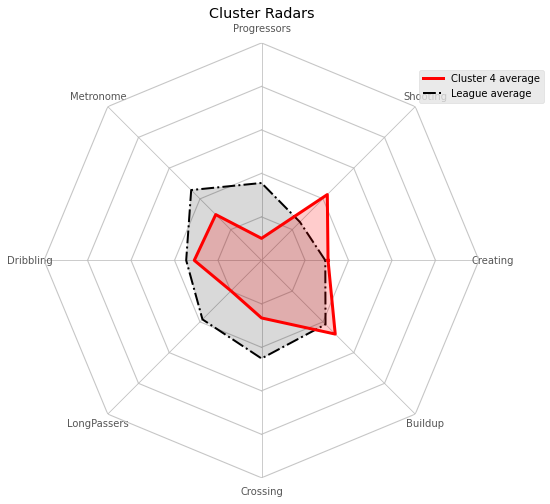

In [84]:
ax = custom_radar(label=4, color='red')

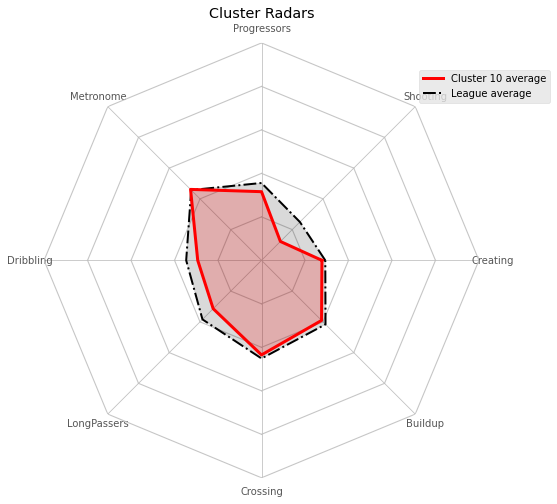

In [85]:
ax = custom_radar(label=10, color='red')

In [76]:

import rpy2.robjects as ro
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr

rpy2.robjects.numpy2ri.activate()

nr,nc = X.shape
Xr = ro.r.matrix(X, nrow=nr, ncol=nc)

ro.r.assign("Xr", Xr)

Unable to determine R home: [WinError 2] The system cannot find the file specified


array([[0.48760159, 0.46201142, 0.33746556, ..., 0.49429876, 0.14702938,
        0.56901212],
       [0.43709742, 0.18150449, 0.22272727, ..., 0.62945404, 0.52907654,
        0.38581719],
       [0.6507701 , 0.40468372, 0.5467248 , ..., 0.53903114, 0.15983844,
        0.75059179],
       ...,
       [0.31171723, 0.06622461, 0.21633139, ..., 0.30378204, 0.90534053,
        0.31216172],
       [0.47580155, 0.18810465, 0.59056474, ..., 0.34346037, 0.31665969,
        0.65460021],
       [0.16750687, 0.09649606, 0.1879555 , ..., 0.68687304, 0.12788049,
        0.2586314 ]])

In [87]:
psych = importr('psych')

fit = psych.principal(Xr, nfactors=8, rotate='promax')

objects_dict = dict(zip(fit.names, list(fit))) ##this dictionary contains all the scores and fit evaluation data
loadings = np.array(objects_dict['loadings'])
##plt.imshow(loadings) ##if you want to check the loadings

array = np.array(objects_dict['scores'])

itp_dims = ['Creating', 'Shooting', 'Progressors', 'Metronome', 'Dribbling',  'LongPassers', 'Crossing', 'Buildup'] ##subjective interpretable metrics - the order is important

results = pd.DataFrame()
results[['player_name', 'label']] = final_data[['player_name', 'cluster']]

results[itp_dims] = array
results[itp_dims] = pd.DataFrame(scaler.fit_transform(results[itp_dims].values), columns=itp_dims, index=results.index) ##scale values to 0,1

In [88]:
roles_dict = { 0: 'Wide Attacker',
               1: 'Metronome',
               2: 'No-Nonsense Defender',
               3: 'Wing-Backs',
               4: 'Linkup Scorers',
               5: 'Wide Linkers',
               6: 'Ball-Playing Def.',
               7: 'Deep-Lying Midfielders',
               8: 'Box-to Box Midfielders',
               9: 'Box Attackers',
               10:'Recyclers'
              }

In [89]:
results

,player_name,label,Creating,Shooting,Progressors,Metronome,Dribbling,LongPassers,Crossing,Buildup
0,Alexandre Lacazette,4,0.452998,0.465810,0.313020,0.116535,0.233880,0.102067,0.056252,0.528711
1,Thomas Partey,1,0.295497,0.297828,0.519749,0.449636,0.328578,0.556004,0.093979,0.506596
2,Bukayo Saka,9,0.561286,0.642210,0.491805,0.258424,0.494886,0.178677,0.301985,0.082929
3,Cédric Soares,5,0.152878,0.314072,0.495318,0.369043,0.192059,0.364319,0.897100,0.712925
4,Kieran Tierney,5,0.176482,0.311179,0.461105,0.374430,0.219221,0.295541,0.796199,0.428797
...,...,...,...,...,...,...,...,...,...,...
217,Fernando Marçal,3,0.151113,0.196721,0.460210,0.340780,0.259599,0.186094,0.412850,0.725725
218,João Moutinho,10,0.148792,0.337163,0.423076,0.385888,0.200212,0.584193,0.201460,0.168297
219,Rúben Neves,7,0.198558,0.280644,0.260764,0.459398,0.265444,0.842779,0.231213,0.231941
220,Daniel Podence,5,0.348361,0.679158,0.219653,0.380891,0.562863,0.225369,0.559429,0.641083


In [90]:
def custom_radar(label, color, ax=None, average=True):
    with plt.style.context('ggplot'):
        ##cleaning and creating radar layout
        if ax is None:
            fig, ax = plt.subplots(subplot_kw={'projection':'polar'}, figsize=(8,8))    
        else:
            fig, ax = ax.get_figure(), ax
        
        thetas = list(np.linspace(0, 2*np.pi, 8, endpoint=False))
        for i in thetas:
            for j in np.linspace(0,1,6, endpoint=True):
                ax.plot([i, i+np.pi/4], [j, j], linestyle='-', color='silver', alpha=.9, lw=1.1, zorder=2)
        ax.grid(b=False, axis='y')
        ax.grid(axis='x', color='silver')
        ax.set_fc('white')
        ax.set(ylim=(0, 1), yticklabels='')

        ax.set_xticks(thetas)
        ax.set_xticklabels(itp_dims)
        ax.spines['polar'].set_visible(False)
        ax.title.set(text='Cluster Radars')

        ##plotting
        pdf = results.query("label==@label")
        heights = pdf[itp_dims].mean()
        ax.fill(thetas, heights, color=color, alpha=.2, zorder=10)
        ax.plot(thetas+[thetas[0]], list(heights)+[heights[0]], color=color, label=roles_dict[label], zorder=10, linewidth=3)
        
        if average:
            league_average_heights = results[itp_dims].mean()
            ax.fill(thetas, league_average_heights, color='k', ec='k', alpha=.15, zorder=5)
            ax.plot(thetas+[thetas[0]], list(league_average_heights)+[league_average_heights[0]], color='k', label="League average", 
                    zorder=5, linewidth=2, linestyle='-.')

        ax.legend(bbox_to_anchor=(0.85, 0.95))
    return ax


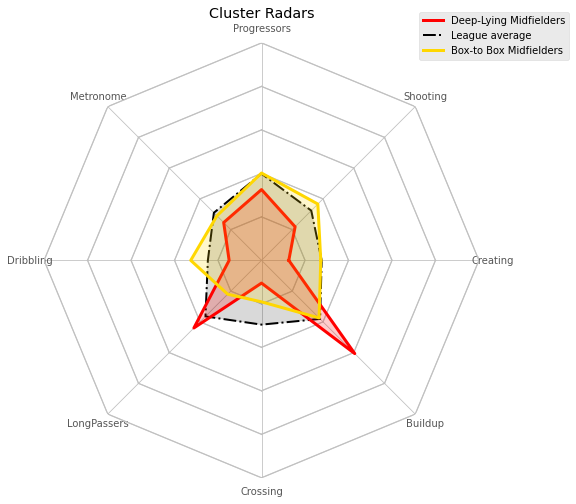

In [91]:
label1, label2 = 7, 8
ax = custom_radar(label1, 'red')
ax = custom_radar(label2, 'gold', ax, average=False)

In [77]:
import umap

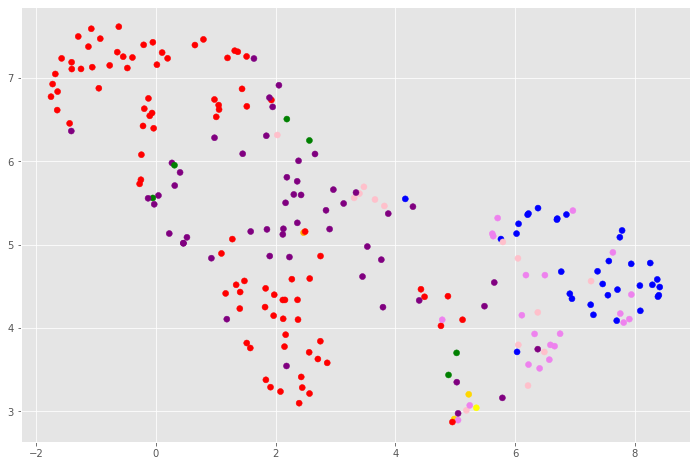

In [78]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(X)
with plt.style.context('ggplot'):
    
    fig, ax = plt.subplots(figsize=(12,8))
    colors = final_data['position'].map({'DF': 'red', 
                             'MF,DF': 'green', 
                             'MF': 'purple', 
                             'MF,FW': 'pink', 
                             'FW': 'blue', 
                             'FW,MF': 'violet',
                             'DF,MF': 'orange', 
                             'DF,FW': 'gold',
                             'FW,DF':'yellow'})

    ax.scatter(x=standard_embedding[:, 0], y=standard_embedding[:, 1], c=colors)

In [79]:
gm_final_um = GaussianMixture(n_components=8, n_init=10, covariance_type="tied", random_state=42)

In [80]:
gm_final_um.fit(standard_embedding)

GaussianMixture(covariance_type='tied', n_components=8, n_init=10,
                random_state=42)

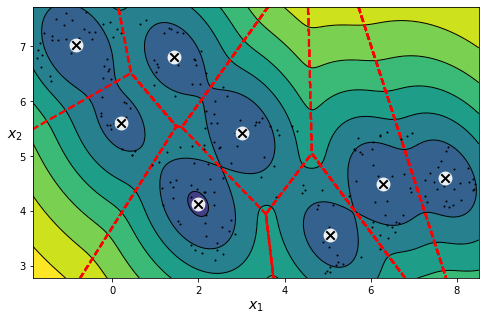

In [81]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(gm_final_um, standard_embedding)
plt.show()

In [82]:
final_data['cluster_um']=gm_final_um.predict(standard_embedding)

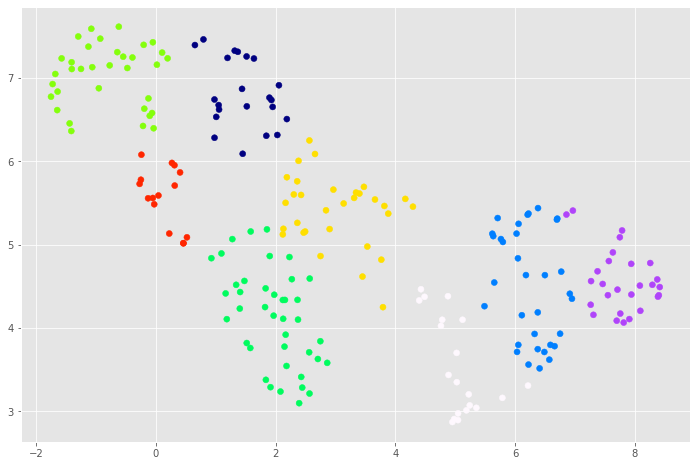

In [83]:
with plt.style.context('ggplot'):
    
    fig, ax = plt.subplots(figsize=(12,8))
    ax.scatter(x=standard_embedding[:, 0], y=standard_embedding[:, 1], c=final_data['cluster_um'], cmap='gist_ncar')

In [84]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(standard_embedding).bic(standard_embedding)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [85]:
best_k

8

In [86]:
best_covariance_type

'tied'

In [87]:
bgm = BayesianGaussianMixture(n_components=8, n_init=10, random_state=42)
bgm.fit(standard_embedding)

BayesianGaussianMixture(n_components=8, n_init=10, random_state=42)

In [88]:
np.round(bgm.weights_, 2)

array([0.21, 0.36, 0.21, 0.22, 0.  , 0.  , 0.  , 0.  ])

In [89]:
print(final_data.query("cluster_um==4")['player_name'].unique())

['Thomas Partey' 'Granit Xhaka' 'Douglas Luiz' 'John McGinn'
 'Jacob Ramsey' 'Vitaly Janelt' 'Christian Nørgaard' 'Alexis Mac Allister'
 'Jakub Moder' 'Josh Brownhill' 'Aaron Lennon' 'Jordan Ayew'
 'Jeffrey Schlupp' 'Abdoulaye Doucouré' 'Stuart Dallas' 'Mateusz Klich'
 'Kiernan Dewsbury-Hall' 'Youri Tielemans' 'Fred' 'Scott McTominay'
 'Miguel Almirón' 'Joelinton' 'Joe Willock' 'Stuart Armstrong'
 'Oriol Romeu' 'Kyle Walker-Peters' 'James Ward-Prowse' 'Juraj Kucka'
 'Aaron Cresswell' 'Declan Rice' 'João Moutinho']


In [90]:
print(final_data.query("cluster_um==0")['player_name'].unique())

['Yves Bissouma' 'Adam Lallana' 'César Azpilicueta' 'Trevoh Chalobah'
 'Andreas Christensen' 'Jorginho' 'Ruben Loftus-Cheek' 'Antonio Rüdiger'
 'Thiago Silva' 'Thiago Alcántara' 'Fabinho' 'Virgil van Dijk'
 'Rúben Dias' 'Aymeric Laporte' 'Rodri' 'Kyle Walker' 'Rodrigo Bentancur'
 'Ben Davies' 'Eric Dier' 'Cristian Romero' 'Davinson Sánchez'
 'Manuel Lanzini']


In [91]:
print(final_data.query("cluster_um==1")['player_name'].unique())

['Bukayo Saka' 'Leandro Trossard' 'Mason Mount' 'Conor Gallagher'
 'Wilfried Zaha' 'Demarai Gray' 'Jack Harrison' 'Raphinha' 'Rodrigo'
 'Harvey Barnes' 'Ademola Lookman' 'James Maddison' 'Diogo Jota'
 'Sadio Mané' 'Mohamed Salah' 'Kevin De Bruyne' 'Phil Foden'
 'Jack Grealish' 'Gabriel Jesus' 'Riyad Mahrez' 'Bernardo Silva'
 'Raheem Sterling' 'Bruno Fernandes' 'Jadon Sancho' 'Allan Saint-Maximin'
 'Milot Rashica' 'Harry Kane' 'Lucas Moura' 'Emmanuel Dennis' 'João Pedro'
 'Ismaila Sarr' 'Michail Antonio' 'Jarrod Bowen']


In [92]:
print(final_data.query("cluster_um==2")['player_name'].unique())

['Cédric Soares' 'Kieran Tierney' 'Takehiro Tomiyasu' 'Matt Targett'
 'Kristoffer Ajer' 'Rico Henry' 'Marc Cucurella' 'Matthew Lowton'
 'Connor Roberts' 'Charlie Taylor' 'Ashley Westwood' 'James McArthur'
 'Tyrick Mitchell' 'Allan' 'Ben Godfrey' 'Timothy Castagne' 'Luke Thomas'
 'Diogo Dalot' 'Luke Shaw' 'Alex Telles' 'Aaron Wan-Bissaka' 'Emil Krafth'
 'Max Aarons' 'Pierre Lees-Melou' 'Kenny McLean' 'Brandon Williams'
 'Valentino Livramento' 'Romain Perraud' 'Emerson' 'Tom Cleverley'
 'Kiko Femenía' 'Hassane Kamara' 'Moussa Sissoko' 'Ben Johnson'
 'Fernando Marçal' 'Nélson Semedo']


In [93]:
print(final_data.query("cluster_um==3")['player_name'].unique())

['Ben White' 'Tyrone Mings' 'Pontus Jansson' 'Ethan Pinnock' 'Lewis Dunk'
 'Joël Veltman' 'Adam Webster' 'Nathan Collins' 'Ben Mee'
 'James Tarkowski' 'Joachim Andersen' 'Joel Ward' 'Mason Holgate'
 'Michael Keane' 'Luke Ayling' 'Liam Cooper' 'Diego Llorente'
 'Pascal Struijk' 'Daniel Amartey' 'Victor Lindelöf' 'Harry Maguire'
 'Jamaal Lascelles' 'Fabian Schär' 'Jonjo Shelvey' 'Ben Gibson'
 'Grant Hanley' 'Jan Bednarek' 'Mohammed Salisu' 'Craig Cathcart'
 'William Troost-Ekong' 'Craig Dawson' 'Kurt Zouma' 'Conor Coady'
 'Max Kilman']


In [94]:
print(final_data.query("cluster_um==4")['player_name'].unique())

['Thomas Partey' 'Granit Xhaka' 'Douglas Luiz' 'John McGinn'
 'Jacob Ramsey' 'Vitaly Janelt' 'Christian Nørgaard' 'Alexis Mac Allister'
 'Jakub Moder' 'Josh Brownhill' 'Aaron Lennon' 'Jordan Ayew'
 'Jeffrey Schlupp' 'Abdoulaye Doucouré' 'Stuart Dallas' 'Mateusz Klich'
 'Kiernan Dewsbury-Hall' 'Youri Tielemans' 'Fred' 'Scott McTominay'
 'Miguel Almirón' 'Joelinton' 'Joe Willock' 'Stuart Armstrong'
 'Oriol Romeu' 'Kyle Walker-Peters' 'James Ward-Prowse' 'Juraj Kucka'
 'Aaron Cresswell' 'Declan Rice' 'João Moutinho']


In [95]:
print(final_data.query("cluster_um==5")['player_name'].unique())

['Dan Burn' 'Shane Duffy' 'Jack Cork' 'Cheikhou Kouyaté' 'Adam Forshaw'
 'Robin Koch' 'Kalvin Phillips' 'Wilfred Ndidi' 'Sean Longstaff'
 'Billy Gilmour' 'Mathias Normann' 'Imran Louza' 'Leander Dendoncker'
 'Rúben Neves']


In [96]:
print(final_data.query("cluster_um==6")['player_name'].unique())

['Alexandre Lacazette' 'Danny Ings' 'Ollie Watkins' 'Bryan Mbeumo'
 'Ivan Toney' 'Neal Maupay' 'Danny Welbeck' 'Maxwel Cornet'
 'Jay Rodriguez' 'Wout Weghorst' 'Chris Wood' 'Kai Havertz'
 'Romelu Lukaku' 'Richarlison' 'Daniel James' 'Jamie Vardy'
 'Cristiano Ronaldo' 'Callum Wilson' 'Teemu Pukki' 'Che Adams'
 'Adam Armstrong' 'Armando Broja' 'Mohamed Elyounoussi' 'Joshua King'
 'Raúl Jiménez']


In [97]:
print(final_data.query("cluster_um==7")['player_name'].unique())

['Mathias Jensen' 'Pascal Groß' 'Tariq Lamptey' 'Solly March'
 'Dwight McNeil' 'Marcos Alonso' 'Reece James' 'Anthony Gordon'
 'Alex Iwobi' 'Andros Townsend' 'Trent Alexander-Arnold'
 'Jordan Henderson' 'Andrew Robertson' 'João Cancelo' 'Ryan Fraser'
 'Jacob Murphy' 'Nathan Redmond' 'Sergio Reguilón' 'Pablo Fornals'
 'Daniel Podence']


In [109]:
print(final_data['cluster_um'].value_counts().sort_values(ascending=False))

2    40
3    34
1    33
4    31
6    27
0    22
7    20
5    15
Name: cluster_um, dtype: int64


In [110]:
final_data['Binary Cluster 0'] = final_data['cluster_um'].map({0:1, 1:0, 2:0,3:0,4:0,5:0,6:0,7:0})

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
clf = RandomForestClassifier(random_state=1)
clf.fit(X, final_data["Binary Cluster 0"].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

# Get the most important features names and weights
most_important_features = np.take_along_axis(
    np.array(final_data[features].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))

[('xGBuildup', 0.23019798326513807),
 ('short_ratio', 0.21868574783996234),
 ('progressive_distance', 0.09543552471138878),
 ('xGChain', 0.06324165605589656),
 ('crosses_pen_area', 0.05270951710997011),
 ('progreceiving_passes', 0.05037094340064239),
 ('KP', 0.04124754460588931),
 ('pass_cmp_rate', 0.04012988068063473),
 ('succ_dribbles', 0.03938339091830135),
 ('progressive_carries', 0.030148496780177267),
 ('npxG', 0.0264435947559768),
 ('progressive_passes', 0.02614332313070713),
 ('xA', 0.025648709380138558),
 ('shot_creating_actions', 0.022968160169363316),
 ('shots', 0.020727099860201697),
 ('long_ratio', 0.01651842733561164)]

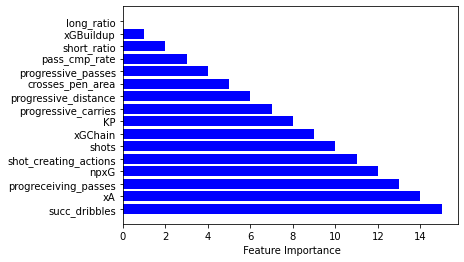

In [128]:
most_important_weights=most_important_weights.argsort()
plt.barh(most_important_features,most_important_weights,alpha = 1, lw=3, color= 'b')
plt.xlabel(" Feature Importance")
plt.savefig('Cluster 1 Exp.jpg',dpi=300,bbox_inches='tight')

In [124]:
final_data['Binary Cluster 1'] = final_data['cluster_um'].map({0:0, 1:1, 2:0,3:0,4:0,5:0,6:0,7:0})

In [125]:
clf = RandomForestClassifier(random_state=3)
clf.fit(X, final_data["Binary Cluster 1"].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

# Get the most important features names and weights
most_important_features = np.take_along_axis(
    np.array(final_data[features].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))

[('succ_dribbles', 0.13690537289505927),
 ('xA', 0.13063502096471236),
 ('progreceiving_passes', 0.12626129976698894),
 ('npxG', 0.10617054081363948),
 ('shot_creating_actions', 0.08851198248593835),
 ('shots', 0.08228577991718712),
 ('xGChain', 0.05915457256814562),
 ('KP', 0.05476562015909203),
 ('progressive_carries', 0.05111562040231888),
 ('progressive_distance', 0.0404137430790316),
 ('crosses_pen_area', 0.03852167161257308),
 ('progressive_passes', 0.02550397259412645),
 ('pass_cmp_rate', 0.02206572578423316),
 ('short_ratio', 0.013901872442464831),
 ('xGBuildup', 0.012439953211238046),
 ('long_ratio', 0.011347251303250847)]

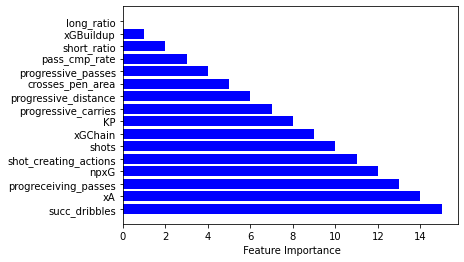

In [127]:
most_important_weights=most_important_weights.argsort()
plt.barh(most_important_features,most_important_weights,alpha = 1, lw=3, color= 'b')
plt.xlabel(" Feature Importance")
plt.savefig('Cluster 2 Exp.jpg',dpi=300,bbox_inches='tight')

In [129]:
final_data['Binary Cluster 2'] = final_data['cluster_um'].map({0:0, 1:0, 2:1,3:0,4:0,5:0,6:0,7:0})

In [130]:
clf = RandomForestClassifier(random_state=3)
clf.fit(X, final_data["Binary Cluster 2"].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

# Get the most important features names and weights
most_important_features = np.take_along_axis(
    np.array(final_data[features].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))

[('crosses_pen_area', 0.17484335481970212),
 ('npxG', 0.1367600407533271),
 ('shots', 0.1315648243433353),
 ('progreceiving_passes', 0.08679301644865847),
 ('long_ratio', 0.06789801868806271),
 ('shot_creating_actions', 0.06462650963324214),
 ('xA', 0.0617219394991961),
 ('xGChain', 0.056440673202556614),
 ('KP', 0.048857024591390893),
 ('progressive_distance', 0.037396694179303934),
 ('progressive_passes', 0.030089057631586303),
 ('xGBuildup', 0.02682227274616927),
 ('progressive_carries', 0.021876859124343163),
 ('short_ratio', 0.019764610768330665),
 ('succ_dribbles', 0.0191876775841843),
 ('pass_cmp_rate', 0.015357425986610851)]

In [131]:
final_data['Binary Cluster 3'] = final_data['cluster_um'].map({0:0, 1:0, 2:0,3:1,4:0,5:0,6:0,7:0})

In [132]:
clf = RandomForestClassifier(random_state=3)
clf.fit(X, final_data["Binary Cluster 3"].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

# Get the most important features names and weights
most_important_features = np.take_along_axis(
    np.array(final_data[features].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))

[('progreceiving_passes', 0.18344694235044812),
 ('shot_creating_actions', 0.1723508317095453),
 ('KP', 0.12678722846152565),
 ('xGChain', 0.06186943498897031),
 ('long_ratio', 0.05765229510161251),
 ('succ_dribbles', 0.05723022746881996),
 ('pass_cmp_rate', 0.05677598962407842),
 ('xA', 0.05317816267204427),
 ('progressive_carries', 0.05144214803689558),
 ('progressive_distance', 0.05130595183684081),
 ('xGBuildup', 0.03990953429487434),
 ('short_ratio', 0.022015627166872897),
 ('shots', 0.020980249853849706),
 ('crosses_pen_area', 0.0169654855173899),
 ('progressive_passes', 0.015510078737343886),
 ('npxG', 0.012579812178888468)]

In [133]:
final_data['Binary Cluster 4'] = final_data['cluster_um'].map({0:0, 1:0, 2:0,3:0,4:1,5:0,6:0,7:0})

In [134]:
clf = RandomForestClassifier(random_state=3)
clf.fit(X, final_data["Binary Cluster 4"].values)
# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

# Get the most important features names and weights
most_important_features = np.take_along_axis(
    np.array(final_data[features].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))

[('short_ratio', 0.0968079218646793),
 ('shot_creating_actions', 0.08635919087539735),
 ('xGChain', 0.07865499077777956),
 ('xA', 0.07460219499713501),
 ('crosses_pen_area', 0.0730118096799462),
 ('npxG', 0.07173820978455896),
 ('KP', 0.06817680542257676),
 ('progreceiving_passes', 0.06663168668261653),
 ('shots', 0.061156036412168324),
 ('pass_cmp_rate', 0.05737948819344982),
 ('progressive_distance', 0.05681234634975024),
 ('progressive_passes', 0.05311641796919554),
 ('xGBuildup', 0.04818630995510048),
 ('long_ratio', 0.0401091896782755),
 ('progressive_carries', 0.037723579266938694),
 ('succ_dribbles', 0.02953382209043171)]

In [135]:
final_data['Binary Cluster 5'] = final_data['cluster_um'].map({0:0, 1:0, 2:0,3:0,4:0,5:1,6:0,7:0})

In [136]:
clf = RandomForestClassifier(random_state=3)
clf.fit(X, final_data["Binary Cluster 5"].values)
# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

# Get the most important features names and weights
most_important_features = np.take_along_axis(
    np.array(final_data[features].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))

[('pass_cmp_rate', 0.15912755288239971),
 ('progressive_carries', 0.09276005758833186),
 ('long_ratio', 0.07867472523215396),
 ('shots', 0.0777673908881888),
 ('xGChain', 0.07752767108205932),
 ('progressive_distance', 0.0726270036699654),
 ('progreceiving_passes', 0.06267111721374785),
 ('succ_dribbles', 0.06182318111668175),
 ('short_ratio', 0.054985173784834245),
 ('xA', 0.05464465364638051),
 ('progressive_passes', 0.043561104495452245),
 ('KP', 0.03709184506748408),
 ('npxG', 0.03555998503790296),
 ('xGBuildup', 0.03528163605417737),
 ('shot_creating_actions', 0.028768125551545544),
 ('crosses_pen_area', 0.02712877668869438)]

In [137]:
final_data['Binary Cluster 6'] = final_data['cluster_um'].map({0:0, 1:0, 2:0,3:0,4:0,5:0,6:1,7:0})

In [138]:
clf = RandomForestClassifier(random_state=3)
clf.fit(X, final_data["Binary Cluster 6"].values)
# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

# Get the most important features names and weights
most_important_features = np.take_along_axis(
    np.array(final_data[features].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))

[('progressive_distance', 0.28593411221630943),
 ('npxG', 0.1815459997920488),
 ('progressive_passes', 0.09940823468743698),
 ('long_ratio', 0.09258756602864938),
 ('shots', 0.05119209855468568),
 ('progreceiving_passes', 0.04888116709881152),
 ('xA', 0.0410087214334852),
 ('xGBuildup', 0.035505062545226125),
 ('progressive_carries', 0.034796764071156554),
 ('crosses_pen_area', 0.03235740332369853),
 ('KP', 0.03093034526912572),
 ('succ_dribbles', 0.02725808546678596),
 ('shot_creating_actions', 0.016454312020836963),
 ('pass_cmp_rate', 0.008766221583681016),
 ('xGChain', 0.008608653240146253),
 ('short_ratio', 0.004765252667916064)]

In [139]:
final_data['Binary Cluster 7'] = final_data['cluster_um'].map({0:0, 1:0, 2:0,3:0,4:0,5:0,6:0,7:1})

In [140]:
clf = RandomForestClassifier(random_state=3)
clf.fit(X, final_data["Binary Cluster 7"].values)
# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

# Get the most important features names and weights
most_important_features = np.take_along_axis(
    np.array(final_data[features].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))

[('crosses_pen_area', 0.2906059405547518),
 ('xA', 0.09672875785096387),
 ('npxG', 0.08770645189990561),
 ('shot_creating_actions', 0.08412549333047602),
 ('progreceiving_passes', 0.08192948072879844),
 ('shots', 0.060651684772651926),
 ('KP', 0.04817760908494892),
 ('progressive_passes', 0.042977445771599995),
 ('xGBuildup', 0.03780480186757738),
 ('short_ratio', 0.03064189834042697),
 ('xGChain', 0.030473990411497117),
 ('progressive_distance', 0.030094519396902268),
 ('progressive_carries', 0.026253642457131528),
 ('pass_cmp_rate', 0.01979023036025731),
 ('succ_dribbles', 0.019722167272962936),
 ('long_ratio', 0.01231588589914796)]

In [98]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm_final_um.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999986940048978

In [146]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation='varimax', n_factors = 8)

fa.fit(X)

fa_Xs = fa.fit_transform(X)

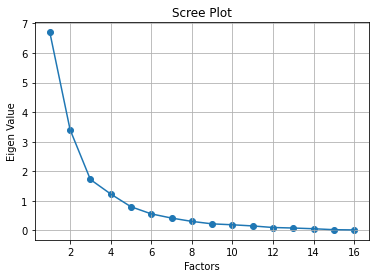

In [147]:
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In [148]:
N_INTERPRETABLE_DIMS=8

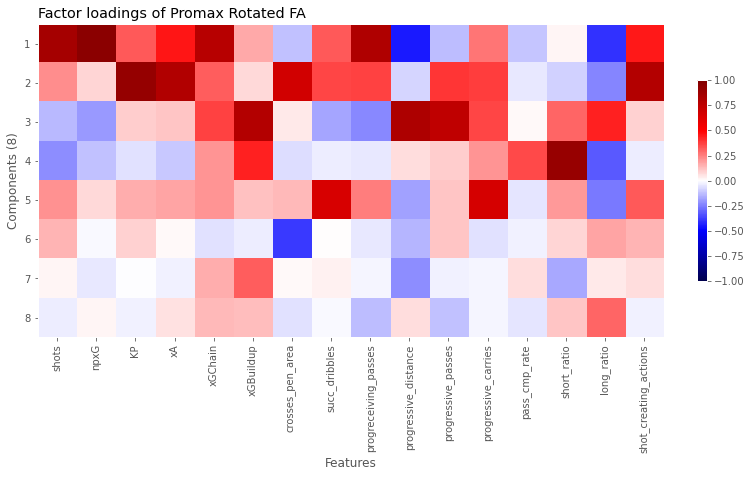

In [149]:
import matplotlib.pyplot as plt

with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(12, 12))
    im = ax.imshow(fa.loadings_.T, cmap='seismic', vmin=-1, vmax=1)
    ax.set_xticks(range(N_FEATURES))
    ax.set_yticks(range(N_INTERPRETABLE_DIMS))
    ax.set_xticklabels(features, rotation=90)
    ax.set_yticklabels(range(1, N_INTERPRETABLE_DIMS + 1))
    plt.colorbar(im, fraction=0.015)
    ax.set(ylabel = f"Components ({N_INTERPRETABLE_DIMS})", xlabel="Features")
    ax.grid(False)
    ax.title.set(text="Factor loadings of Promax Rotated FA", x=0, ha='left')

In [150]:
vxs = fa_Xs
vxs = scaler.fit_transform(vxs)
vxs.shape

vcols = ['Creating', 'Shooting', 'Progression', 'Ball retention', 'Dribbling',  'Verticality', 'Crossing', 'Buildup'] ##subjective dims 

results = pd.DataFrame(vxs, columns = vcols)
results['label'] = final_data['cluster_um']

def custom_radar(label, color, ax=None, average=True):
    with plt.style.context('ggplot'):
        ##cleaning and creating radar layout
        if ax is None:
            fig, ax = plt.subplots(subplot_kw={'projection':'polar'}, figsize=(8,8))    
        else:
            fig, ax = ax.get_figure(), ax
        
        thetas = list(np.linspace(0, 2*np.pi, 8, endpoint=False))
        for i in thetas:
            for j in np.linspace(0,1,6, endpoint=True):
                ax.plot([i, i+np.pi/4], [j, j], linestyle='-', color='silver', alpha=.9, lw=1.1, zorder=2)
        ax.grid(b=False, axis='y')
        ax.grid(axis='x', color='silver')
        ax.set_fc('white')
        ax.set(ylim=(0, 1), yticklabels='')

        ax.set_xticks(thetas)
        ax.set_xticklabels(vcols)
        ax.spines['polar'].set_visible(False)
        ax.title.set(text='Cluster Radars')

        ##plotting
        pdf = results.query("label==@label")
        heights = pdf[vcols].mean()
        ax.fill(thetas, heights, color=color, alpha=.2, zorder=10)
        ax.plot(thetas+[thetas[0]], list(heights)+[heights[0]], color=color, label= f"Cluster {label} average", zorder=10, linewidth=3) ##
        
        if average:
            league_average_heights = results[vcols].mean()
            ax.fill(thetas, league_average_heights, color='k', ec='k', alpha=.15, zorder=5)
            ax.plot(thetas+[thetas[0]], list(league_average_heights)+[league_average_heights[0]], color='k', label="League average", 
                    zorder=5, linewidth=2, linestyle='-.')

        ax.legend(bbox_to_anchor=(0.85, 0.95))
    return ax

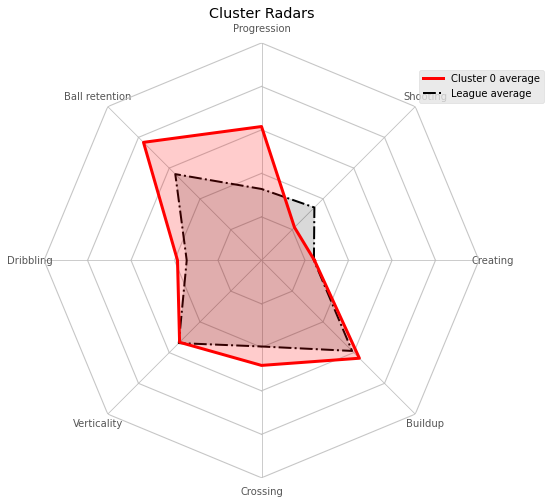

In [151]:
ax = custom_radar(label=0, color='red')
plt.savefig("Cluster 1.png",dpi=300,tight_layout=True)

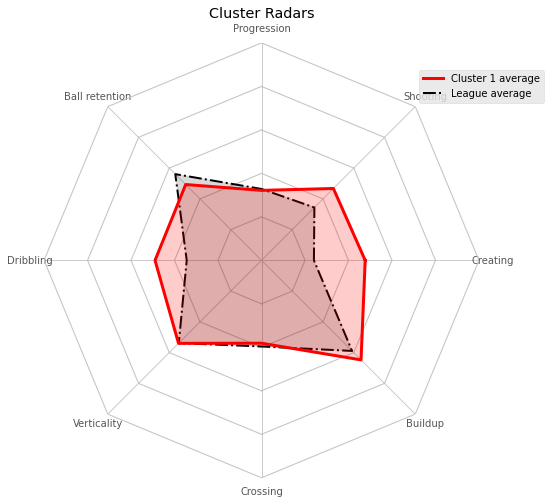

In [152]:
ax = custom_radar(label=1, color='red')
plt.savefig("Cluster 2.png",dpi=300,tight_layout=True)

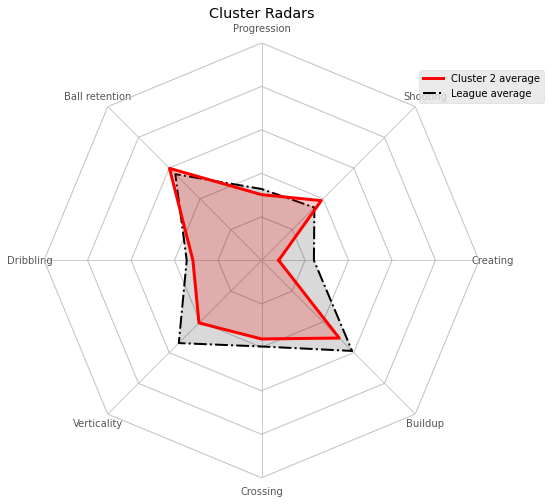

In [153]:
ax = custom_radar(label=2, color='red')
plt.savefig("Cluster 3.png",dpi=300,tight_layout=True)

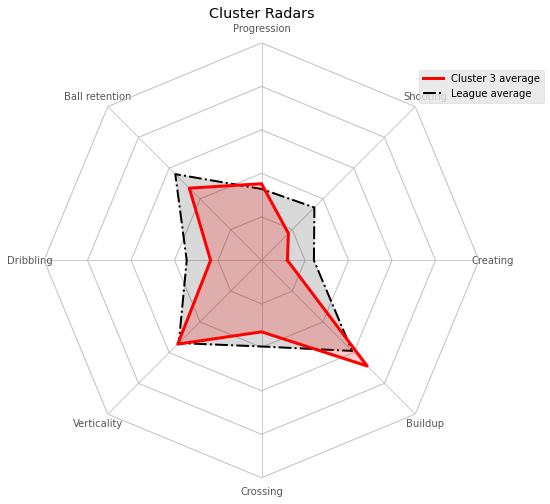

In [154]:
ax = custom_radar(label=3, color='red')
plt.savefig("Cluster 4.png",dpi=300,tight_layout=True)

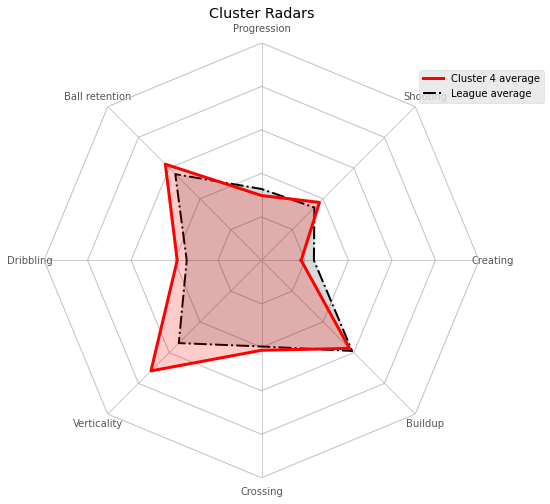

In [155]:
ax = custom_radar(label=4, color='red')
plt.savefig("Cluster 5.png",dpi=300,tight_layout=True)

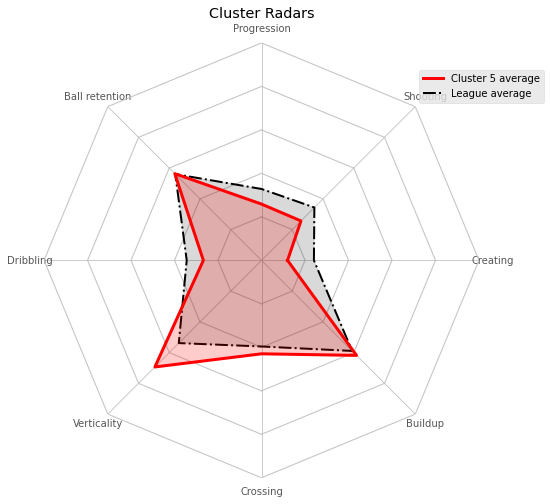

In [156]:
ax = custom_radar(label=5, color='red')
plt.savefig("Cluster 6.png",dpi=300,tight_layout=True)

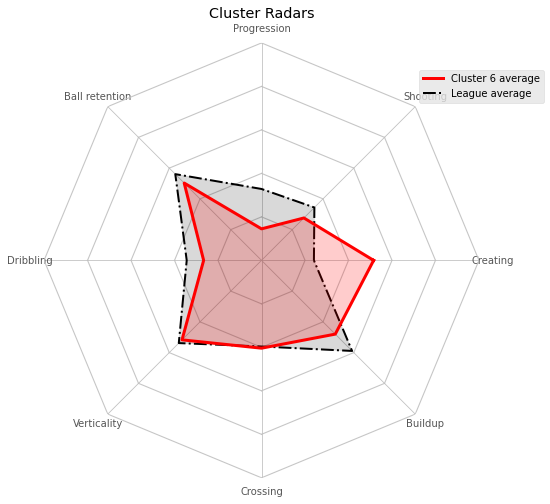

In [157]:
ax = custom_radar(label=6, color='red')
plt.savefig("Cluster 7.png",dpi=300,tight_layout=True)

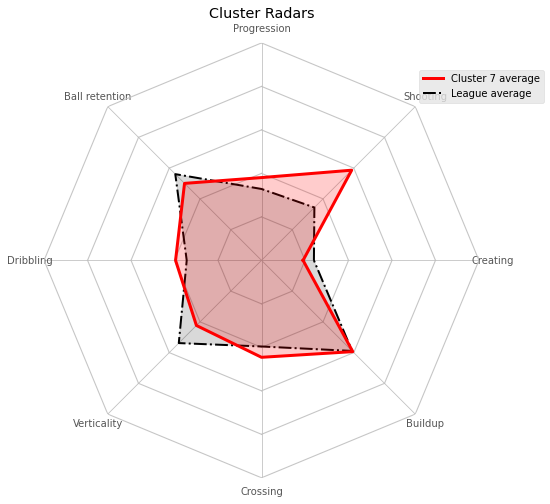

In [158]:
ax = custom_radar(label=7, color='red')
plt.savefig("Cluster 8.png",dpi=300,tight_layout=True)

In [164]:
psych = importr('psych')

fit = psych.principal(Xr, nfactors=8, rotate='promax')

objects_dict = dict(zip(fit.names, list(fit))) ##this dictionary contains all the scores and fit evaluation data
loadings = np.array(objects_dict['loadings'])
##plt.imshow(loadings) ##if you want to check the loadings

array = np.array(objects_dict['scores'])

itp_dims = ['Creating', 'Shooting', 'Progressors', 'Metronome', 'Dribbling',  'Verticality', 'Crossing', 'Buildup'] ##subjective interpretable metrics - the order is important

results = pd.DataFrame()
results[['player_name', 'label']] = final_data[['player_name', 'cluster_um']]

results[itp_dims] = array
results[itp_dims] = pd.DataFrame(scaler.fit_transform(results[itp_dims].values), columns=itp_dims, index=results.index) ##scale values to 0,1

In [165]:
roles_dict = { 0: 'Buildup Masters',
               1: 'Hybrid Attackers',
               2: 'Wide Support',
               3: 'Ball-Playing Defenders',
               4: 'Deep-Lying Midfielders',
               5: 'Recyclers',
               6: 'Box Attackers',
               7: 'Crossing Kings',
              }

In [166]:
def custom_radar(label, color, ax=None, average=True):
    with plt.style.context('ggplot'):
        ##cleaning and creating radar layout
        if ax is None:
            fig, ax = plt.subplots(subplot_kw={'projection':'polar'}, figsize=(8,8))    
        else:
            fig, ax = ax.get_figure(), ax
        
        thetas = list(np.linspace(0, 2*np.pi, 8, endpoint=False))
        for i in thetas:
            for j in np.linspace(0,1,6, endpoint=True):
                ax.plot([i, i+np.pi/4], [j, j], linestyle='-', color='silver', alpha=.9, lw=1.1, zorder=2)
        ax.grid(b=False, axis='y')
        ax.grid(axis='x', color='silver')
        ax.set_fc('white')
        ax.set(ylim=(0, 1), yticklabels='')

        ax.set_xticks(thetas)
        ax.set_xticklabels(itp_dims)
        ax.spines['polar'].set_visible(False)
        ax.title.set(text='Cluster Radars')

        ##plotting
        pdf = results.query("label==@label")
        heights = pdf[itp_dims].mean()
        ax.fill(thetas, heights, color=color, alpha=.2, zorder=10)
        ax.plot(thetas+[thetas[0]], list(heights)+[heights[0]], color=color, label=roles_dict[label], zorder=10, linewidth=3)
        
        if average:
            league_average_heights = results[itp_dims].mean()
            ax.fill(thetas, league_average_heights, color='k', ec='k', alpha=.15, zorder=5)
            ax.plot(thetas+[thetas[0]], list(league_average_heights)+[league_average_heights[0]], color='k', label="League average", 
                    zorder=5, linewidth=2, linestyle='-.')

        ax.legend(bbox_to_anchor=(0.85, 0.95))
    return ax

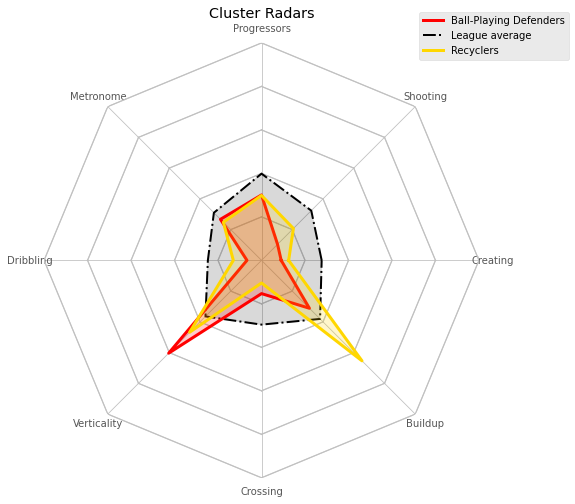

In [168]:
label1, label2 = 3, 5
ax = custom_radar(label1, 'red')
ax = custom_radar(label2, 'gold', ax, average=False)
plt.savefig("BPD v Recyclers",dpi=300,tight_layout=True)

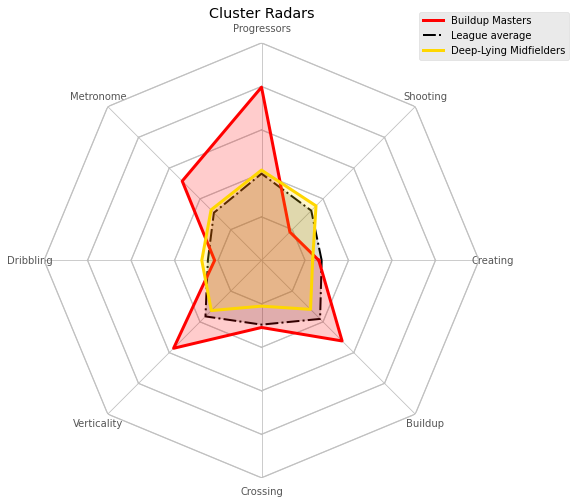

In [169]:
label1, label2 = 0, 4
ax = custom_radar(label1, 'red')
ax = custom_radar(label2, 'gold', ax, average=False)
plt.savefig("Buildup v Deep Lying Midfielders",dpi=300,tight_layout=True)

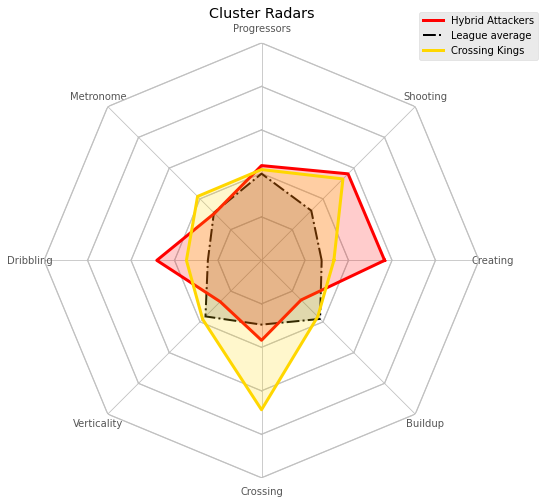

In [172]:
label1, label2 = 1, 7
ax = custom_radar(label1, 'red')
ax = custom_radar(label2, 'gold', ax, average=False)
plt.savefig("Hybrid Attackers v Crossers",dpi=300,tight_layout=True)

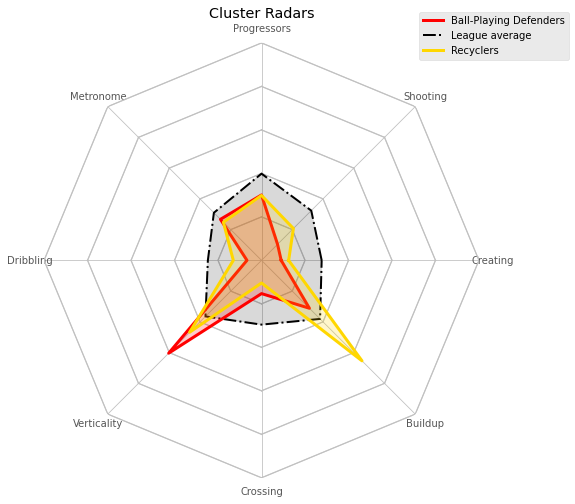

In [173]:
label1, label2 = 3, 5
ax = custom_radar(label1, 'red')
ax = custom_radar(label2, 'gold', ax, average=False)
plt.savefig("BPD v pivots",dpi=300,tight_layout=True)

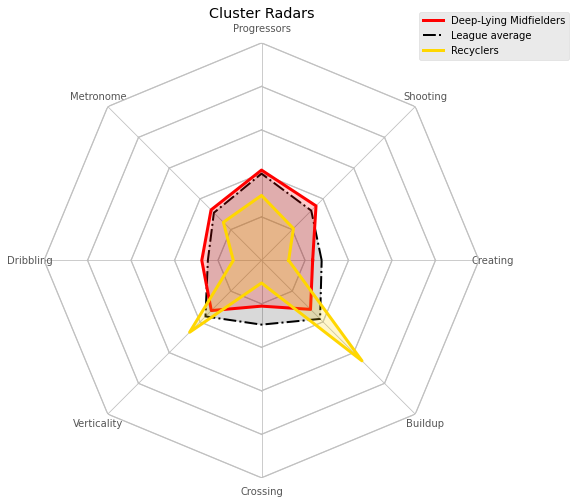

In [175]:
label1, label2 = 4, 5
ax = custom_radar(label1, 'red')
ax = custom_radar(label2, 'gold', ax, average=False)
plt.savefig("Deep Lying MF v pivots",dpi=300,tight_layout=True)

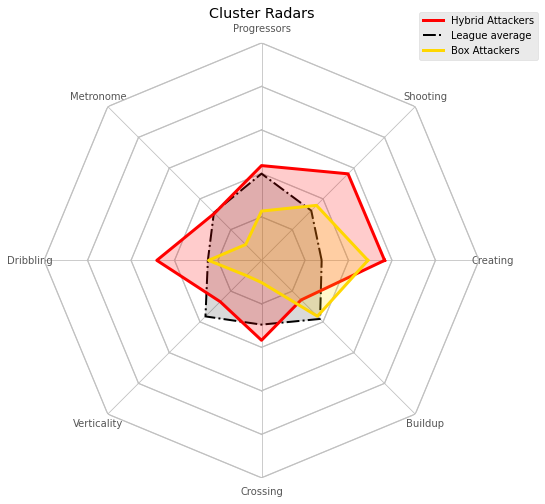

In [174]:
label1, label2 = 1, 6
ax = custom_radar(label1, 'red')
ax = custom_radar(label2, 'gold', ax, average=False)
plt.savefig("Hybrid v Box Attackers",dpi=300,tight_layout=True)

In [147]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(standard_embedding)
             for k in range(1, 11)]

In [148]:
bics = [model.bic(standard_embedding) for model in gms_per_k]
aics = [model.aic(standard_embedding) for model in gms_per_k]

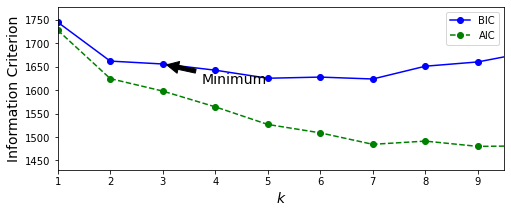

In [149]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.savefig("aic_bic_vs_k_plot_final",dpi=300,tight_layout=True)
plt.show()

In [182]:
from advanced_pca import CustomPCA
vpca = CustomPCA(n_components=8).fit(X)

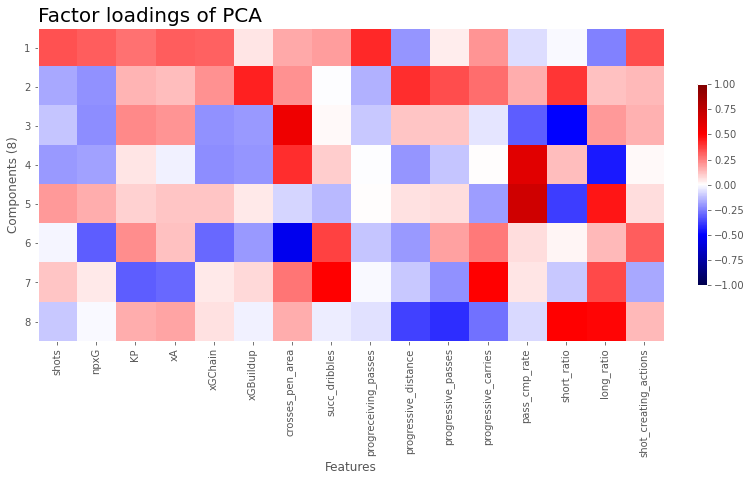

In [183]:

with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(12, 12))
    im = ax.imshow(vpca.components_, cmap='seismic', vmin=-1, vmax=1)
    ax.set_xticks(range(N_FEATURES))
    ax.set_yticks(range(N_INTERPRETABLE_DIMS))
    ax.set_xticklabels(features, rotation=90)
    ax.set_yticklabels(range(1, N_INTERPRETABLE_DIMS + 1))
    plt.colorbar(im, fraction=0.015)
    ax.set(ylabel = f"Components ({N_INTERPRETABLE_DIMS})", xlabel="Features")
    ax.grid(False)
    ax.title.set(text="Factor loadings of PCA", x=0, ha='left', fontsize=20, y=10)